## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.
import requests
from bs4 import BeautifulSoup
import time

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [3]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

qts=[]

for i in range(1, 6):
    res=requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup=BeautifulSoup(res.text, "html.parser")
    
    questions=soup.find_all("li", "question-list-item")
    for question in questions:
        qts.append(question.find("div", "question").find("div", "top").h4.text)

    time.sleep(0.5)


In [4]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

['파이썬 연결 리스트 질문드립니다.', '공백삭제 관련질문드립니다', '[Pandas] dataframe for문으로 여러개 만들기.', 'ai와 겨루는 3*3 틱텍토 게임 구현 코드를 짜는 중에 오류가 생겼습니다.', 'GUI 구성 시 엔진 부분과 GUI 부분을 분리하는 철학, 방식, 메소드에 관한 조언 ', '자바 객체선언 오류 질문입니다!', '파이썬 간단한 코드 질문', '[ASP, VB.NET] API 제공 중인데 json 값 앞에 태그가 붙은 이유가 뭘까요?', "'''로 주석으로 만들었는데 왜 주석을 지우지 않으면 유니코드오류가 왜 나는지 모르겠어여", '#define 상수 선언떄', '우분투 vmware 가상머신 오류', '파이썬 멀티스레딩 질문', '파이썬 엑셀 파일 읽기', '머쓱이 스탬프 할때 답보기요', 'BFS를 사용해도 무관한지 궁금합니다!', 'C# 백준 25206 문제 뭐가 문제인지 확인시켜줄 고수분 ', 'python 제너레이터화', '리액트 쿼리에서 useQuery를 어떻게 사용해야하나요', 'html/javascript 로 node.js통해서 아두이노 통신관련', 'Binary search tree', 'Python 정규표현식을 사용한 패턴 추출', " code: 'MODULE_NOT_FOUND' 좀 도와주세요", '파이썬 데이터베이스 저장할때 다른방법없을까요?', '코딩테스트 첫번째 폰켓몬 문제 왜 맞는건가요?', '좋아요 한 문제만 따로 볼 수 있나요?', '멀티프로세싱 프로그램 실행시 수십개의 프로그램이 실행됩니다.', 'c언어 왜 소수점을 넣어야 결과가 나오나', 'HTML 전혀 모르는데요', 'QR코드만 이용해서 앱 개발을 하면 많이 힘들까요?', '(생초보) 파이썬 *매개변수의 개수', '로지스틱 회귀', '프로그래머스 코딩테스트 2단계 구명보트에서', 'Java 개인 연습 중 배열에서 오류가 났는데 해결 방법을 모르겠습니다.', '파이썬 csv 파일을 불러와 구분하는 방법에 대해 질문 드립니다', "다음의 xar

In [8]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.
words=[]
hannanum=Hannanum()

for question in qts:
    nouns=hannanum.nouns(question)
    words+=nouns

print(len(words))


1025


In [9]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter=Counter(words)

counter

Counter({'파이썬': 47,
         '연결': 2,
         '리스트': 3,
         '질문드': 10,
         '공백삭제': 1,
         '관련질문드': 1,
         '문': 7,
         '여러개': 1,
         '3*3': 1,
         '틱텍토': 1,
         '게임': 1,
         '구현': 5,
         '코드': 15,
         '중': 9,
         '오류': 16,
         '구성': 1,
         '시': 6,
         '엔진': 1,
         '부분': 3,
         '분리': 1,
         '철학': 1,
         '방식': 3,
         '메소드': 6,
         '조언': 2,
         '자바': 6,
         '객체선언': 1,
         '질문': 52,
         '한': 3,
         '제공': 1,
         '값': 7,
         '앞': 1,
         '태그': 1,
         '이유': 3,
         '뭘까요': 2,
         '주석': 2,
         '유니코드오류': 1,
         '모르겠어': 1,
         '#define': 1,
         '상수': 1,
         '선언떄': 1,
         '우분투': 1,
         '가상머신': 1,
         '멀티스레딩': 1,
         '엑셀': 1,
         '파': 6,
         '읽기': 1,
         '머쓱': 1,
         '스탬프': 1,
         '때': 10,
         '답보기요': 1,
         '사용': 11,
         '무관한지': 1,
         '궁금': 4,
         

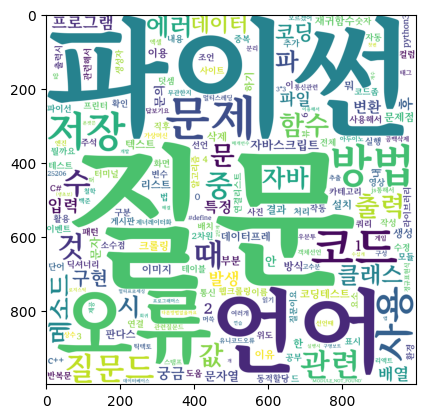

In [11]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud=WordCloud(
    font_path="../MaruBuri-Bold.ttf",
    background_color="white",
    height=1000,
    width=1000,
)

img=wordcloud.generate_from_frequencies(counter)
plt.imshow(img)